In [231]:
import warnings
import numpy as np
import lazypredict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [232]:
df = pd.read_excel('Jamu_metabolite_.xlsx')

In [233]:
del df["V1"]
del df["baru"]
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C3482,C3483,C3484,C3485,C3486,C3487,C3488,C3489,C3490,label update
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [234]:
# distribution of class label
df["label update"].value_counts()

3    170
4     82
6     66
2     58
1     19
5      2
Name: label update, dtype: int64

In [235]:
df.shape

(397, 3491)

In [236]:
# remove colomn with all values are zero
df = df.loc[:, (df != 0).any(axis=0)]

In [237]:
# remove data with label 2
df.drop(df[df["label update"] == 5].index, inplace=True)


In [238]:
x = df.iloc[:,0:2255]
y = df.iloc[:,2255:]

In [239]:
y.head()

,label update
0,6
1,6
2,6
3,6
4,6


In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [241]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:20<00:00,  1.43it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.75,0.68,None,0.74,0.27
LGBMClassifier,0.73,0.66,None,0.73,0.42
XGBClassifier,0.75,0.65,None,0.73,1.66
BernoulliNB,0.70,0.65,None,0.70,0.08
LogisticRegression,0.73,0.65,None,0.73,0.95
NearestCentroid,0.68,0.64,None,0.69,0.07
RidgeClassifierCV,0.72,0.64,None,0.71,0.19
RandomForestClassifier,0.71,0.62,None,0.70,0.23
LinearSVC,0.70,0.62,None,0.69,2.33


# try deep learning

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [243]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [244]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [245]:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13, 13),
              max_iter=500)

In [246]:
predictions = mlp.predict(X_test)

In [247]:
print(confusion_matrix(y_test,predictions))

[[ 2  0  1  1  0]
 [ 0  8  1  4  3]
 [ 0  3 31  6  4]
 [ 0  3  1 10  5]
 [ 0  1  0  4 11]]


In [248]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.53      0.50      0.52        16
           3       0.91      0.70      0.79        44
           4       0.40      0.53      0.45        19
           6       0.48      0.69      0.56        16

    accuracy                           0.63        99
   macro avg       0.66      0.58      0.60        99
weighted avg       0.69      0.63      0.64        99



accuracy of each class:
[1.         0.53333333 0.91176471 0.4        0.47826087]


Text(60.0, 0.5, 'label (ground truth)')

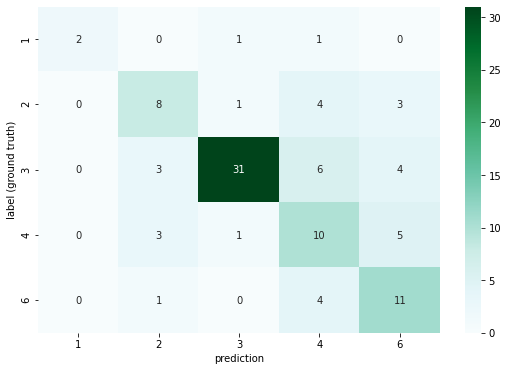

In [249]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred, y_true = predictions, y_test

# draw confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
# accuracy of each class
per_cls_acc = cf_matrix.diagonal()/cf_matrix.sum(axis=0)
class_names = ['1', '2', '3', '4', '6']
print('accuracy of each class:')
print(per_cls_acc)

# plot and save
df_cm = pd.DataFrame(cf_matrix, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
# plt.savefig('/Users/kouhai/Documents/PPT/confusion_matrix_3.pdf')


In [271]:
# lightGBM
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [272]:
# predict the results
y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train)
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9733
Test set score: 0.8451


In [273]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[41  0  1  0  0]
 [ 3 35  0  5  0]
 [ 2  1 36  1  0]
 [ 2  4  1 37  3]
 [ 2  2  1  5 31]]


In [253]:
# try undersampling pra-prosessa

In [254]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

In [256]:
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(x, y)

In [257]:
x = X_res
y = y_res

In [258]:
print(x.shape)

(850, 2255)


In [259]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.2)

In [260]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:43<00:00,  1.51s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.84,0.84,None,0.84,3.54
ExtraTreesClassifier,0.84,0.84,None,0.84,0.41
RandomForestClassifier,0.84,0.84,None,0.84,0.41
LGBMClassifier,0.84,0.83,None,0.83,0.84
BaggingClassifier,0.83,0.83,None,0.83,0.49
LinearSVC,0.82,0.81,None,0.82,5.18
RidgeClassifierCV,0.81,0.81,None,0.81,0.54
CalibratedClassifierCV,0.80,0.80,None,0.80,20.36
Perceptron,0.80,0.80,None,0.80,0.43


In [261]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [262]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [264]:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13, 13),
              max_iter=500)

In [265]:
predictions = mlp.predict(X_test)

In [266]:
print(confusion_matrix(y_test,predictions))

[[40  1  1  0  0]
 [ 0 36  1  4  2]
 [ 0  2 36  1  1]
 [ 0  2  4 34  7]
 [ 0  5  0  3 33]]


In [267]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        42
           2       0.78      0.84      0.81        43
           3       0.86      0.90      0.88        40
           4       0.81      0.72      0.76        47
           6       0.77      0.80      0.79        41

    accuracy                           0.84       213
   macro avg       0.84      0.84      0.84       213
weighted avg       0.84      0.84      0.84       213



accuracy of each class:
[1.         0.7826087  0.85714286 0.80952381 0.76744186]


Text(60.0, 0.5, 'label (ground truth)')

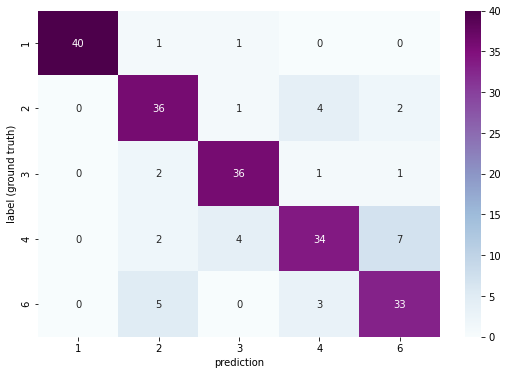

In [270]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred, y_true = predictions, y_test

# draw confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
# accuracy of each class
per_cls_acc = cf_matrix.diagonal()/cf_matrix.sum(axis=0)
class_names = ['1', '2', '3', '4', '6']
print('accuracy of each class:')
print(per_cls_acc)

# plot and save
df_cm = pd.DataFrame(cf_matrix, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuPu')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
# plt.savefig('/Users/kouhai/Documents/PPT/confusion_matrix_3.pdf')

In [280]:
y["label update"].value_counts()

6    170
4    170
3    170
2    170
1    170
Name: label update, dtype: int64

In [281]:
x['label'] = y["label update"]

In [283]:
x.to_csv('Formula_Jamu_Sept_oversampling.csv')